In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def get_clf_eval(y_test, pred=None) :
    confusion = confusion_matrix(y_test, pred) #오차 행렬
    accuracy = accuracy_score(y_test, pred)    #정확도
    precision = precision_score(y_test, pred)  #정밀도
    recall = recall_score(y_test, pred)        #재현율
    f1 = f1_score(y_test, pred)                #F1
    roc_auc = roc_auc_score(y_test, pred)#ROC-AUC
    
    print('오차 행렬')
    print(confusion)
    
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

    
def precision_recall_curve_plot(y_test, pred_proba) :
    #threshold ndarray와 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    #x축을 threshold 값으로, y축은 정밀도, 재현율 값으로 각각 plot 수행 및 점밀도는 점선으로 표시
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold 값 x 축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #x, y축 라벨과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    


In [45]:
#https://www.kaggle.com/uciml/pima-indians-diabetes-database
dia_data = pd.read_csv('diabetes.csv')
'''
Pregnancies : 임신 횟수
Gloucose : 포도당 부하 검사 수치
BloodPressure : 혈압
SkinThickness : 삼두근 뒤쪽 피하지방 측정값
Insuline : 인슐린
BMI : 체질량지수
DiabetesPedigreeFunction : 당뇨 내력 가중치
Age : 나이
Outcome : 클래스 결정 값 (0 or 1)
'''

#특징 데이터 ,x와 레이블 데이터 y
#outcome이 y가 되어야 함.
x = dia_data.iloc[:, :-1]
y = dia_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = y)

#로지스틱 회귀로 학습, 예측, 평가
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test, pred)

#재현율이 많이 모자름.
#전체 데이터의 65%가 Negative이기 때문.

오차 행렬
[[92  8]
 [25 29]]
정확도 : 0.7857, 정밀도 : 0.7838, 재현율 : 0.5370, F1 : 0.6374, AUC : 0.7285


C:\Users\mkjh9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


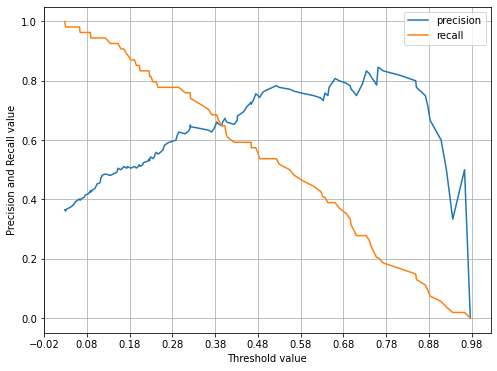

In [46]:
#정밀도 재현율 곡선을 보고 임곗값별 정밀도와 재현율 값의 변화를 확인.
precision_recall_curve_plot(y_test, pred_proba)
#0.42 부근에서 정밀도와 재현율의 균형이 맞음을 확인
#하지만 두 개 지표 모두 0.7도 안되는 수치로 값이 너무 낮음
#임곗값의 인위적 조작이 필요

In [47]:
print(dia_data.describe())
#min값이 0으로 되어 있는 것들이 많음.

#min이 0인 애들
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#피처별로 반복하면서 데이터 값이 
mean_zero_features = dia_data[zero_features].mean()
dia_data[zero_features] = dia_data[zero_features].replace(0, mean_zero_features)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [49]:
#특징 데이터 ,x와 레이블 데이터 y
#outcome이 y가 되어야 함.
x = dia_data.iloc[:, :-1]
y = dia_data.iloc[:, -1]

#StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = y)

#로지스틱 회귀로 학습, 예측, 평가
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)

get_clf_eval(y_test, pred)

오차 행렬
[[92  8]
 [27 27]]
정확도 : 0.7727, 정밀도 : 0.7714, 재현율 : 0.5000, F1 : 0.6067, AUC : 0.7100


C:\Users\mkjh9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.preprocessing import Binarizer

#재현율 수치의 개선이 필요함.
def get_eval_by_threshold(y_test, pred_proba, thresholds) :
    #평가지표 조사를 위한 함수
    #thresholds 내 값을 차례로 iteration 하며 EVALUATION 수행
    for custom_threshold in thresholds :
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba)
        custom_predict = binarizer.transform(pred_proba)
        print('임계값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

#0.3에서 0.5까지 0.03씩 변화
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

임계값 :  0.3
오차 행렬
[[76 24]
 [12 42]]
정확도 : 0.7662, 정밀도 : 0.6364, 재현율 : 0.7778, F1 : 0.7000, AUC : 0.7689
임계값 :  0.33
오차 행렬
[[80 20]
 [14 40]]
정확도 : 0.7792, 정밀도 : 0.6667, 재현율 : 0.7407, F1 : 0.7018, AUC : 0.7704
임계값 :  0.36
오차 행렬
[[81 19]
 [16 38]]
정확도 : 0.7727, 정밀도 : 0.6667, 재현율 : 0.7037, F1 : 0.6847, AUC : 0.7569
임계값 :  0.39
오차 행렬
[[82 18]
 [19 35]]
정확도 : 0.7597, 정밀도 : 0.6604, 재현율 : 0.6481, F1 : 0.6542, AUC : 0.7341
임계값 :  0.42
오차 행렬
[[85 15]
 [24 30]]
정확도 : 0.7468, 정밀도 : 0.6667, 재현율 : 0.5556, F1 : 0.6061, AUC : 0.7028
임계값 :  0.45
오차 행렬
[[89 11]
 [25 29]]
정확도 : 0.7662, 정밀도 : 0.7250, 재현율 : 0.5370, F1 : 0.6170, AUC : 0.7135
임계값 :  0.48
오차 행렬
[[91  9]
 [26 28]]
정확도 : 0.7727, 정밀도 : 0.7568, 재현율 : 0.5185, F1 : 0.6154, AUC : 0.7143
임계값 :  0.5
오차 행렬
[[92  8]
 [27 27]]
정확도 : 0.7727, 정밀도 : 0.7714, 재현율 : 0.5000, F1 : 0.6067, AUC : 0.7100


In [52]:
#위의 결과를 보고 임곗값을 설정하여 진행
#0.48이 가장 좋은 결과라면
binarizer = Binarizer(threshold = 0.48)
#lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값 반환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1, 1))
get_clf_eval(y_test, pred_th_048)

오차 행렬
[[91  9]
 [26 28]]
정확도 : 0.7727, 정밀도 : 0.7568, 재현율 : 0.5185, F1 : 0.6154, AUC : 0.7143
